# Libraries

In [1]:
import glob

In [11]:
from PIL import Image

In [15]:
import numpy as np

In [18]:
import matplotlib.pyplot as plt

In [29]:
from sklearn.utils import shuffle

In [32]:
from sklearn.model_selection import train_test_split

In [36]:
from sklearn.linear_model import LogisticRegression

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [68]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Data Collection

In [6]:
no_smile = glob.glob("data/non_smile/*.jpg")
smile = glob.glob("data/smile/*.jpg")
test = glob.glob("data/test/*.jpg")

In [7]:
type(no_smile)

list

In [9]:
len(no_smile)

603

In [10]:
len(smile)

600

# Data Cleaning

In [12]:
pic1 = Image.open(no_smile[22]).convert("L")

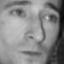

In [20]:
pic1

In [13]:
pic1.size

(64, 64)

In [16]:
pixel_array = np.array(pic1)

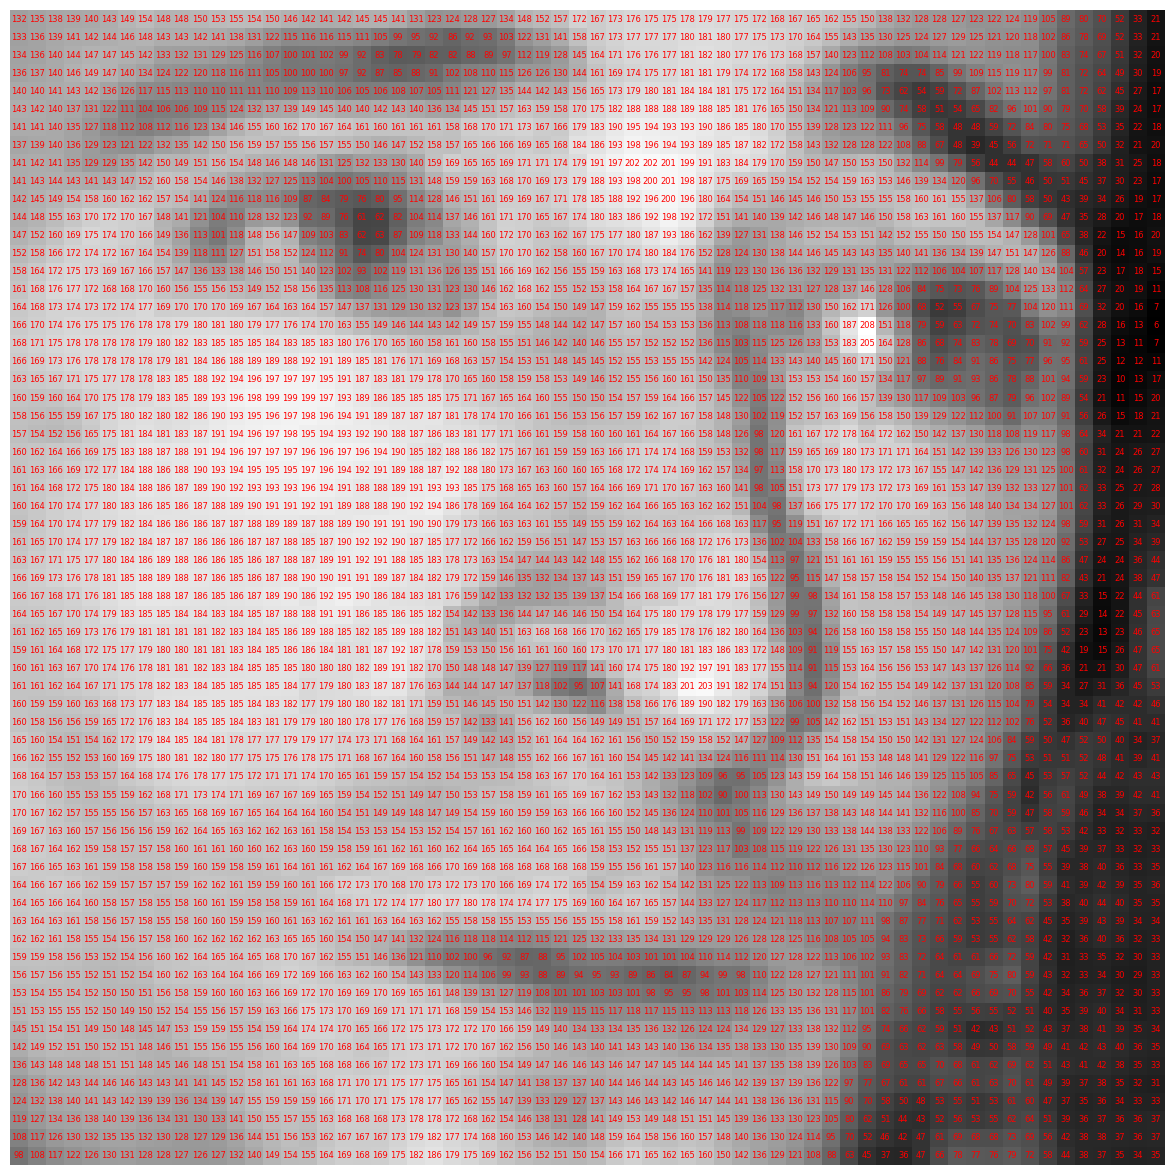

In [19]:
plt.figure(figsize=(15, 15))
plt.imshow(pixel_array, cmap="gray", interpolation="nearest")

# Show pixel values overlaid on image
for i in range(64):
    for j in range(64):
        plt.text(j, i, pixel_array[i, j], ha="center", va="center", fontsize=6, color="red")

plt.axis("off")
plt.show()

In [21]:
data = []
labels = []

In [22]:
# Load Smiling Images
for img_name in smile:
    img = Image.open(img_name).convert("L")  # Convert to grayscale
    img_array = np.array(img).flatten()  # Flatten to 1D array
    data.append(img_array)
    labels.append(1)  # 1 = Smiling

In [23]:
# Load Non-Smiling Images
for img_name in no_smile:
    img = Image.open(img_name).convert("L")  # Convert to grayscale
    img_array = np.array(img).flatten()  # Flatten to 1D array
    data.append(img_array)
    labels.append(0)  # 0 = Non-Smiling

In [24]:
len(data)

1203

In [25]:
type(data[0])

numpy.ndarray

In [26]:
type(labels[0])

int

In [96]:
# 📌 Convert to NumPy arrays
X = np.array(data)  # Features (image pixels)
y = np.array(labels)  # Labels (0 or 1)

In [95]:
# 📌 Normalize pixel values (0 to 1)
# X = X / 255.0

In [97]:
X,y = shuffle(X,y,random_state=42)

# Model developement

In [98]:
# 📌 Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
X_train.shape, X_test.shape

((962, 4096), (241, 4096))

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [101]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [102]:
# 📌 Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [103]:
# 📌 Make Predictions
y_pred = model.predict(X_test_scaled)

In [104]:
y_pred_train = model.predict(X_train_scaled)

In [51]:
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [52]:
model.predict_proba(X_test)

array([[1.71670680e-01, 8.28329320e-01],
       [3.77465027e-01, 6.22534973e-01],
       [7.04547786e-01, 2.95452214e-01],
       [1.86837931e-01, 8.13162069e-01],
       [1.12874728e-01, 8.87125272e-01],
       [7.56879707e-01, 2.43120293e-01],
       [8.71039070e-03, 9.91289609e-01],
       [9.33299646e-02, 9.06670035e-01],
       [2.74425584e-02, 9.72557442e-01],
       [1.23900404e-01, 8.76099596e-01],
       [5.37193041e-02, 9.46280696e-01],
       [4.26801645e-01, 5.73198355e-01],
       [6.41125378e-01, 3.58874622e-01],
       [8.55143659e-02, 9.14485634e-01],
       [1.27008002e-02, 9.87299200e-01],
       [5.23928472e-01, 4.76071528e-01],
       [8.11436249e-03, 9.91885638e-01],
       [9.56565114e-02, 9.04343489e-01],
       [8.35875130e-01, 1.64124870e-01],
       [4.30861853e-01, 5.69138147e-01],
       [4.14756478e-02, 9.58524352e-01],
       [7.15041423e-03, 9.92849586e-01],
       [4.92630908e-02, 9.50736909e-01],
       [9.85321384e-02, 9.01467862e-01],
       [9.766467

In [106]:
# 📌 Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.8382
Confusion Matrix:
 [[103  20]
 [ 19  99]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       123
           1       0.83      0.84      0.84       118

    accuracy                           0.84       241
   macro avg       0.84      0.84      0.84       241
weighted avg       0.84      0.84      0.84       241



# Hyperparameter Tuning

In [46]:
# Define parameter grid
param_grid = {
    'penalty' : ['l1','l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga', 'newton-cg']
}

In [59]:
log_reg = LogisticRegression()

In [65]:
cv = StratifiedKFold()

In [69]:
# Perform grid search
grid_search = GridSearchCV(log_reg, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

C:\Users\keert\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\keert\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\keert\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\keert\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver = _chec

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs', 'sag', 'saga',
                                    'newton-cg']},
             scoring='accuracy')

In [72]:
grid_search.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}

In [73]:
grid_search.best_score_

0.8918879533678756

In [90]:
tuned_model = grid_search.best_estimator_ 

# The Best Model

In [91]:
y_pred = tuned_model.predict(X_test_scaled)

In [92]:
# 📌 Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.8506
Confusion Matrix:
 [[104  19]
 [ 17 101]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       123
           1       0.84      0.86      0.85       118

    accuracy                           0.85       241
   macro avg       0.85      0.85      0.85       241
weighted avg       0.85      0.85      0.85       241



# MLOPS

In [86]:
import pickle

In [93]:
pickle.dump(tuned_model, open('smile_stalker.pkl', 'wb'))

In [94]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [150]:
# Open the test image
image = Image.open("test1.jpg").convert("L")  
resized_image = image.resize((64, 64))

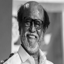

In [151]:
resized_image

In [152]:
img_array = np.array(resized_image).flatten()
sc = scaler.transform(img_array.reshape(1,-1))

In [154]:
tuned_model.predict_proba(sc)

array([[0.99812236, 0.00187764]])

In [ ]:
prediction_proba